##### In order to run the bellow cells, download Amazon datasets for electronics from https://amazon-reviews-2023.github.io/main.html and place them in the ```/data``` folder.

In [1]:
import json
import pandas as pd

In [2]:
with open('../../data/meta_Video_Games.jsonl', 'r') as f:
    first_line = json.loads(f.readline())

In [3]:
first_line

{'main_category': 'Video Games',
 'title': 'Dash 8-300 Professional Add-On',
 'average_rating': 5.0,
 'rating_number': 1,
 'features': ["Features Dash 8-300 and 8-Q300 ('Q' rollout livery)",
  'Airlines - US Airways, South African Express, Bahamasair, Augsburg Airways, Lufthansa Cityline, British Airways (Union Jack), British European, FlyBe, Intersky, Wideroe, Iberia, Tyrolean, QantasLink, BWIA',
  'Airports include - London City, Frankfurt, Milan and Amsterdam Schipol',
  'Includes PSS PanelConfig and LoadEdit tools'],
 'description': ['The Dash 8-300 Professional Add-On lets you pilot a real commuter special. Fly two versions of the popular Dash 8-300 in a total of 17 different liveries. The Dash 8-300 is one of the most popular short-haul aircraft available and this superbly modelled version from acclaimed aircraft developers PSS is modelled in two versions with a total of 17 different liveries. The package also includes scenery for three European airports, tutorials, tutorial flig

## Filter Items that have been observed for the first time in year 2022 or later.

In [4]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True

    return filter

In [5]:
with open("../../data/meta_Video_Games.jsonl", 'r') as fp:
    with open("../../data/meta_Video_Games_2022_2023.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../../data/meta_Video_Games_2022_2023_no_date.jsonl", 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines


## Split the items into two categories: "has main category", "does not have main category"

In [6]:
def filter_category(data: dict) -> dict:
    filter = False
    if data['main_category'] == None:
        filter = True

    return filter

In [7]:
with open("../../data/meta_Video_Games_2022_2023.jsonl", 'r') as fp:
    with open("../../data/meta_Video_Games_2022_2023_with_category.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../../data/meta_Video_Games_2022_2023_no_category.jsonl", 'a', encoding='utf-8') as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()

## Explore distribution by categories

In [8]:
df = pd.read_json("../../data/meta_Video_Games_2022_2023_with_category.jsonl", lines=True)

In [9]:
df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Cell Phones & Accessories,"Replacement Screen for Nintendo Switch Lite, L...",4.5,26,[COMPATIBILITY: Compatible with Nintendo Switc...,[],46.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'For Nintendo Switch Screen Install...,Generic,"[Video Games, Nintendo Switch, Accessories, Fa...",{'Package Dimensions': '7.99 x 4.41 x 1.1 inch...,B09QXCZ6CX,NaN
1,Computers,Anivia Headphones with Mirrophones Wired Heads...,4.0,816,[【Surrounding Stereo Subwoofer】Anivia gaming h...,[gaming headset],13.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Gaming Headsets Under $50', 'url':...",Anivia,"[Video Games, Xbox One, Accessories, Headsets]",{'Package Dimensions': '7.48 x 7.13 x 3.31 inc...,B0C3LTVMNZ,NaN
2,Video Games,Nintendo Switch Sports (Nintendo Switch) (Euro...,4.7,4930,"[Swing, kick and spike your way to victory wit...",[Nintendo Switch Sports],40.85,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Nintendo Switch sports is so much ...,Nintendo,"[Video Games, Nintendo Switch, Games]","{'Language': 'English', 'Product Dimensions': ...",B09SRXBT8Y,NaN
3,Video Games,Crescent Marketing and Distribution Deathsmile...,4.7,71,[Contains both part I and II with multiple mod...,[Deathsmiles is a side-scrolling bullet hell s...,39.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Crescent Marketing and Distribution,"[Video Games, PlayStation 4, Games]","{'Release date': 'July 8, 2022', 'Best Sellers...",B09XSJ282Q,NaN
4,Video Games,"PHNIXGAM Cat Ear Gaming Cute Headset, Wired Ov...",4.3,323,[Girly Cat Ear: The cute cat ears are made of ...,[],37.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'white and pink cat ear headphones'...,PHNIXGAM,"[Video Games, PC]",{'Package Dimensions': '8.74 x 6.69 x 4.49 inc...,B0BMLVYQZD,NaN


<Axes: xlabel='main_category'>

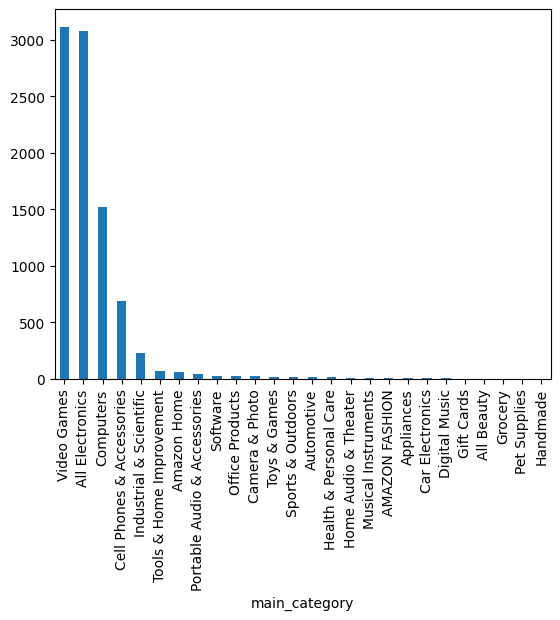

In [11]:
df['main_category'].value_counts().plot(kind='bar')

### Filter out items that have at least 100 ratings

In [24]:
df_ratings_10 = df[df['rating_number'] > 10]

In [17]:
len(df)

8959

In [25]:
len(df_ratings_10)

6492

<Axes: xlabel='main_category'>

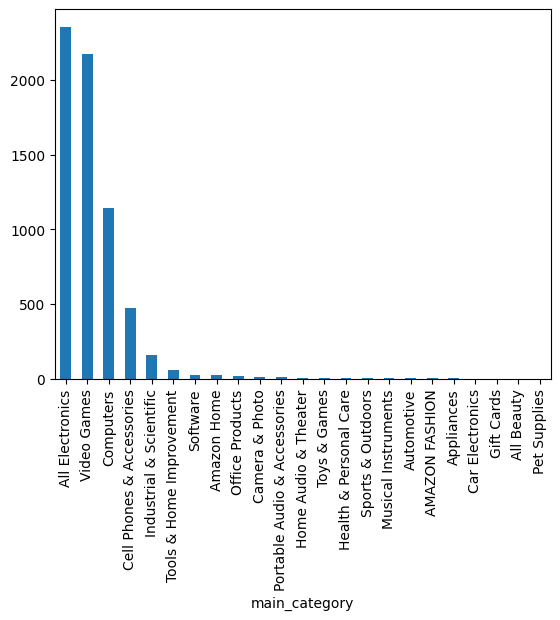

In [26]:
df_ratings_10['main_category'].value_counts().plot(kind='bar')

## Explore distribution of ratings

<Axes: ylabel='Frequency'>

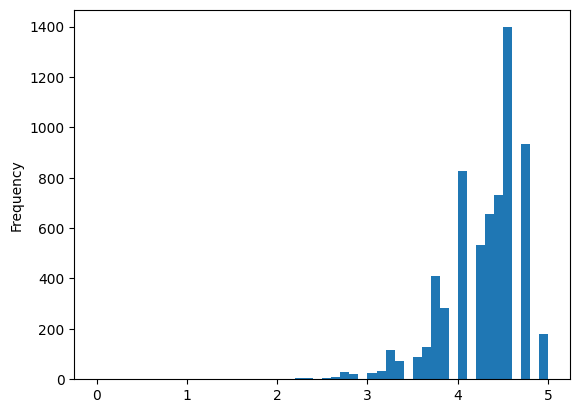

In [27]:
df_ratings_10['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

#### Sample 1000 items

In [28]:
df_sample_1000 = df_ratings_10.sample(n=1000, random_state=20)

<Axes: ylabel='Frequency'>

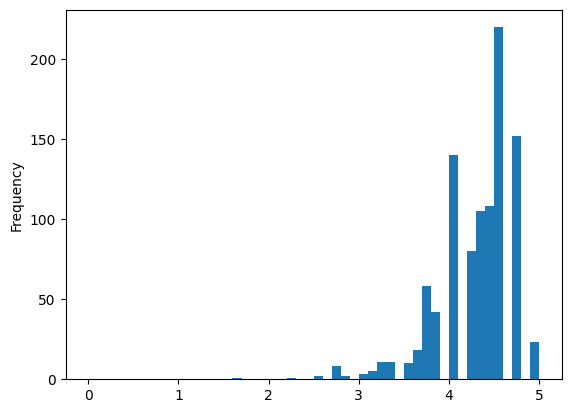

In [29]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

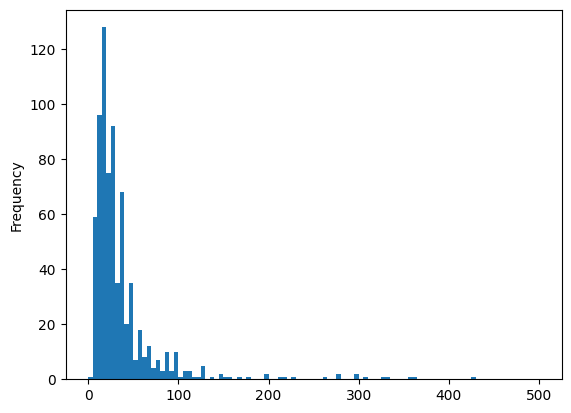

In [30]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

<Axes: xlabel='main_category'>

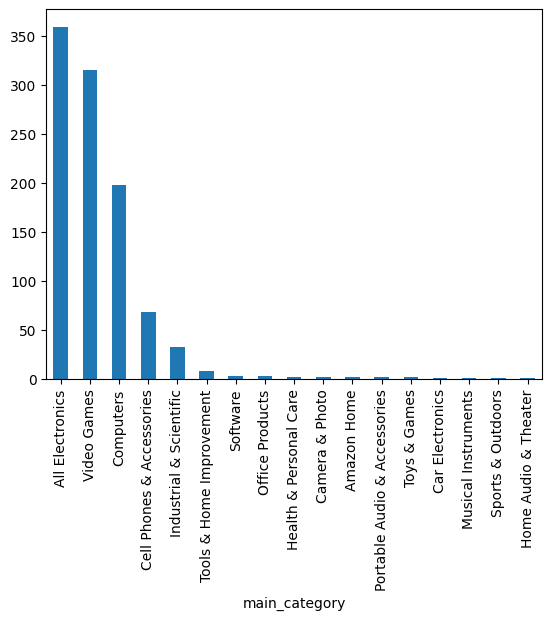

In [31]:
df_sample_1000['main_category'].value_counts().plot(kind='bar')

In [32]:
df_ratings_10.to_json("../../data/meta_Video_Games_2022_2023_with_category_ratings_10.jsonl", orient='records', lines=True)

In [33]:
df_sample_1000.to_json("../../data/meta_Video_Games_2022_2023_with_category_ratings_10_sample_1000.jsonl", orient='records', lines=True)

## Extract ratings that match sampled data.

In [34]:
df_ratings_10 = pd.read_json("../../data/meta_Video_Games_2022_2023_with_category_ratings_10.jsonl", lines=True)
df_sample_1000 = pd.read_json("../../data/meta_Video_Games_2022_2023_with_category_ratings_10_sample_1000.jsonl", lines=True)

In [35]:
with open("../../data/Video_Games.jsonl", 'r') as fp:
    with open("../../data/Video_Games_2022_2023_with_category_ratings_10.jsonl", 'a') as fp_out:
        id_list = set(df_ratings_10['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
Processed 1800000 lines
Processed 1900000 lines
Processed 2000000 lines
Processed 2100000 lines
Processed 2200000 lines
Processed 2300000 lines
Processed 2400000 lines
Processed 2500000 lines
Processed 2600000 lines
Processed 2700000 lines
Processed 2800000 lines
Processed 2900000 lines
Processed 3000000 lines
Processed 3100000 lines
Processed 3200000 lines
Processed 3300000 lines
Processed 3400000 lines
Processed 3500000 lines
Processed 3600000 lines
Processed 3700000 lines
Processed 3800000 lines
Processed 3900000 lines
Processed 4000000 lines
Processed 4100000 lines
Processed 4200000 lines
P

In [36]:
with open("../../data/Video_Games_2022_2023_with_category_ratings_10.jsonl", 'r') as fp:
    with open("../../data/Video_Games_2022_2023_with_category_ratings_10_sample_1000.jsonl", 'a') as fp_out:
        id_list = set(df_sample_1000['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
